In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package stopwords to C:\Users\my
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\my
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
df = pd.read_csv('data_analysis.csv', encoding='unicode_escape')

In [88]:
df.head()

,tanggal,user,txt,analysis
0,2020-12-14 16:05:28,Bamboozle8787,ike_Pence ealDonaldTrump It is a great day! Ou...,positif
1,2020-12-14 16:05:28,rayray94,ilaryluros We need to tell King Sore Loser tha...,negatif
2,2020-12-14 16:05:28,obx_on,ernovich TLegionaire Jill Biden doctor,negatif
3,2020-12-14 16:05:28,Lyonlllisa,hebradfordfile arbara73063051 And Joe Biden be...,negatif
4,2020-12-14 16:05:27,butterflly63,Electoral College votes today and will seal Tr...,negatif


In [89]:
df.drop(columns=['tanggal', 'user'], inplace=True)

In [90]:
df.head()

,txt,analysis
0,ike_Pence ealDonaldTrump It is a great day! Ou...,positif
1,ilaryluros We need to tell King Sore Loser tha...,negatif
2,ernovich TLegionaire Jill Biden doctor,negatif
3,hebradfordfile arbara73063051 And Joe Biden be...,negatif
4,Electoral College votes today and will seal Tr...,negatif


# proses cleaning data text tweet

In [91]:
def clean_text(txt):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", txt).lower()
df['cleaned_text'] = df['txt'].apply(lambda x: clean_text(x))
df['label'] = df['analysis'].map({'negatif':0, 'positif':1})

In [92]:
df.head(20)

,txt,analysis,cleaned_text,label
0,ike_Pence ealDonaldTrump It is a great day! Ou...,positif,ike pence ealdonaldtrump it is a great day ou...,1
1,ilaryluros We need to tell King Sore Loser tha...,negatif,ilaryluros we need to tell king sore loser tha...,0
2,ernovich TLegionaire Jill Biden doctor,negatif,ernovich tlegionaire jill biden doctor,0
3,hebradfordfile arbara73063051 And Joe Biden be...,negatif,hebradfordfile arbara73063051 and joe biden be...,0
4,Electoral College votes today and will seal Tr...,negatif,electoral college votes today and will seal tr...,0
5,Perspective | The Wall Street Journal column a...,negatif,perspective the wall street journal column a...,0
6,"eanhannity Good morning trumpanzees, today the...",positif,eanhannity good morning trumpanzees today the...,1
7,iffanyWatters2 ewser_SW nnew003 atthewJshow ea...,negatif,iffanywatters2 ewser sw nnew003 atthewjshow ea...,0
8,Itâs clear that with the Electoral College s...,positif,it s clear that with the electoral college s...,1
9,ash_O_Pepper mpadellan Cool coz it's like he's...,positif,ash o pepper mpadellan cool coz it s like he s...,1


Menambahkan fitur tambahan - panjang, dan persentase tanda baca dalam teks

In [93]:
def count_punct(txt):
    count = sum([1 for char in txt if char in string.punctuation])
    return round(count/(len(txt) - txt.count(" ")), 3)*100
df['text_len'] = df['txt'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['txt'].apply(lambda x: count_punct(x))
df.head()

,txt,analysis,cleaned_text,label,text_len,punct
0,ike_Pence ealDonaldTrump It is a great day! Ou...,positif,ike pence ealdonaldtrump it is a great day ou...,1,96,3.1
1,ilaryluros We need to tell King Sore Loser tha...,negatif,ilaryluros we need to tell king sore loser tha...,0,94,0.0
2,ernovich TLegionaire Jill Biden doctor,negatif,ernovich tlegionaire jill biden doctor,0,34,0.0
3,hebradfordfile arbara73063051 And Joe Biden be...,negatif,hebradfordfile arbara73063051 and joe biden be...,0,97,0.0
4,Electoral College votes today and will seal Tr...,negatif,electoral college votes today and will seal tr...,0,55,5.5


# proses tokenisasi text tweet
yaitu mengubah teks menjadi potongan kata

In [94]:
def tokenize_text(txt):
    tokenized_text = txt.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,txt,analysis,cleaned_text,label,text_len,punct,tokens
0,ike_Pence ealDonaldTrump It is a great day! Ou...,positif,ike pence ealdonaldtrump it is a great day ou...,1,96,3.1,"[ike, pence, ealdonaldtrump, it, is, a, great,..."
1,ilaryluros We need to tell King Sore Loser tha...,negatif,ilaryluros we need to tell king sore loser tha...,0,94,0.0,"[ilaryluros, we, need, to, tell, king, sore, l..."
2,ernovich TLegionaire Jill Biden doctor,negatif,ernovich tlegionaire jill biden doctor,0,34,0.0,"[ernovich, tlegionaire, jill, biden, doctor]"
3,hebradfordfile arbara73063051 And Joe Biden be...,negatif,hebradfordfile arbara73063051 and joe biden be...,0,97,0.0,"[hebradfordfile, arbara73063051, and, joe, bid..."
4,Electoral College votes today and will seal Tr...,negatif,electoral college votes today and will seal tr...,0,55,5.5,"[electoral, college, votes, today, and, will, ..."


# proses lemmatisasi dan menghilangkan stopword

In [95]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [96]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,txt,analysis,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,ike_Pence ealDonaldTrump It is a great day! Ou...,positif,ike pence ealdonaldtrump it is a great day ou...,1,96,3.1,"[ike, pence, ealdonaldtrump, it, is, a, great,...",ike penny ealdonaldtrump great day elector vot...
1,ilaryluros We need to tell King Sore Loser tha...,negatif,ilaryluros we need to tell king sore loser tha...,0,94,0.0,"[ilaryluros, we, need, to, tell, king, sore, l...",ilaryluros need tell king sore loser every tim...
2,ernovich TLegionaire Jill Biden doctor,negatif,ernovich tlegionaire jill biden doctor,0,34,0.0,"[ernovich, tlegionaire, jill, biden, doctor]",ernovich tlegionaire jill biden doctor
3,hebradfordfile arbara73063051 And Joe Biden be...,negatif,hebradfordfile arbara73063051 and joe biden be...,0,97,0.0,"[hebradfordfile, arbara73063051, and, joe, bid...",hebradfordfile arbara73063051 joe biden big bo...
4,Electoral College votes today and will seal Tr...,negatif,electoral college votes today and will seal tr...,0,55,5.5,"[electoral, college, votes, today, and, will, ...",electoral college vote today seal trump fate


# Penggalian teks dengan model bag of words

In [97]:
X = df[['lemmatized_text', 'text_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(30, 3)
(70,)
(30,)


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,...,75,76,77,78,79,80,81,82,83,84
0,82,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.410788,0.0,0.0,0.0,0.0,0.0,0.0
1,93,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,22,13.6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.455633,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,93,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Melatih model Klasifikasi yang berbeda

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.00      0.00      0.00        10

    accuracy                           0.63        30
   macro avg       0.33      0.47      0.39        30
weighted avg       0.44      0.63      0.52        30



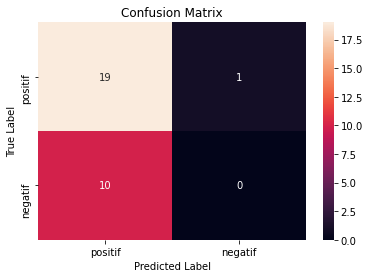

In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["positif", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.00      0.00      0.00        10

    accuracy                           0.63        30
   macro avg       0.33      0.47      0.39        30
weighted avg       0.44      0.63      0.52        30



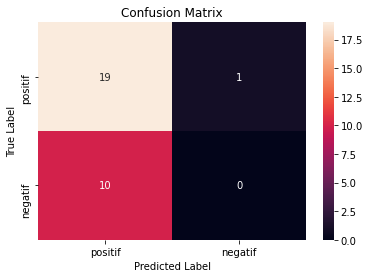

In [102]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["positif", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        20
           1       1.00      0.10      0.18        10

    accuracy                           0.70        30
   macro avg       0.84      0.55      0.50        30
weighted avg       0.79      0.70      0.60        30



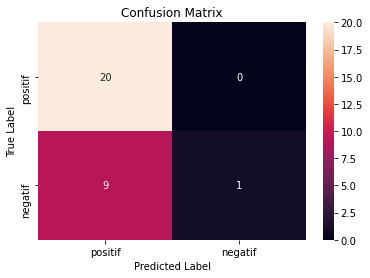

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["positif", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        20
           1       1.00      0.10      0.18        10

    accuracy                           0.70        30
   macro avg       0.84      0.55      0.50        30
weighted avg       0.79      0.70      0.60        30



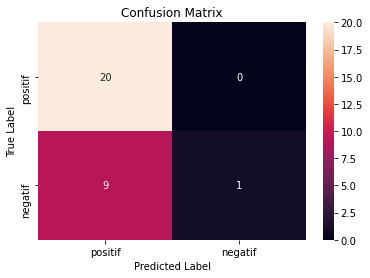

In [104]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["positif", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.50      0.10      0.17        10

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



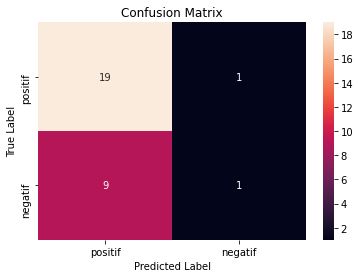

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["positif", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritme dengan kinerja terbaik sejauh ini tampaknya menjadi SVM Linear, Random Forest, dan klasifikasi Regresi Logistik.